In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
colnames=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'] 
df = pd.read_csv('abalone.data', delimiter=',', names=colnames)

In [3]:
#printing the columns of the dataset
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [4]:
df.shape

(4177, 9)

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### **Analysis**
We can see that the height has a minimum value of zero. This is not possible and is considered an anamoly. We will have to remove these rows that have zero in height.

In [8]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [9]:
df.drop(index=[1257,3996], inplace = True)
df.shape

(4175, 9)

In [10]:
df['Age'] = df['Rings']+1.5 #AS per the problem statement
df.drop('Rings', axis = 1, inplace = True)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Explortory Data Analysis

## Box Plot: Age Vs Sex

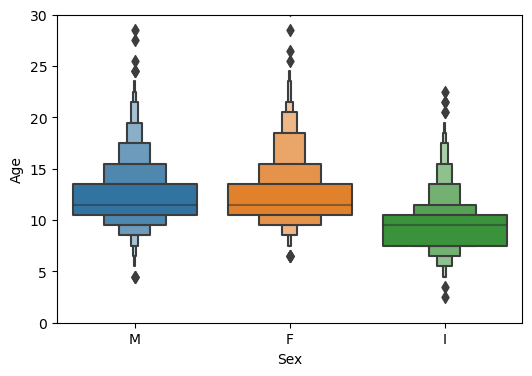

In [11]:
temp = pd.concat([df['Age'], df['Sex']], axis=1)

f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxenplot(x='Sex', y="Age", data=df)
fig.axis(ymin=0, ymax=30);

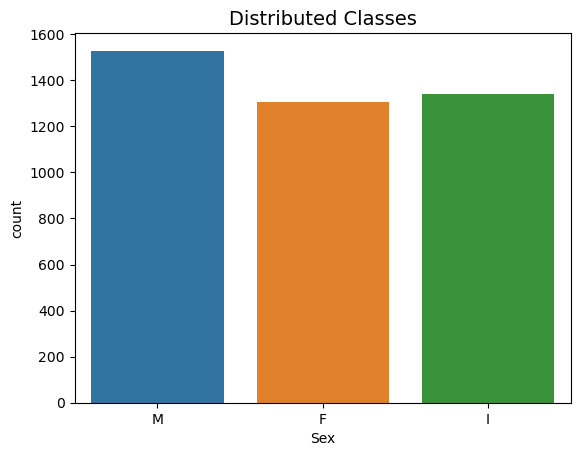

In [12]:
sns.countplot(x='Sex', data=df)
plt.title('Distributed Classes', fontsize=14)
plt.show()

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole_weight'}>],
       [<AxesSubplot:title={'center':'Shucked_weight'}>,
        <AxesSubplot:title={'center':'Viscera_weight'}>,
        <AxesSubplot:title={'center':'Shell_weight'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

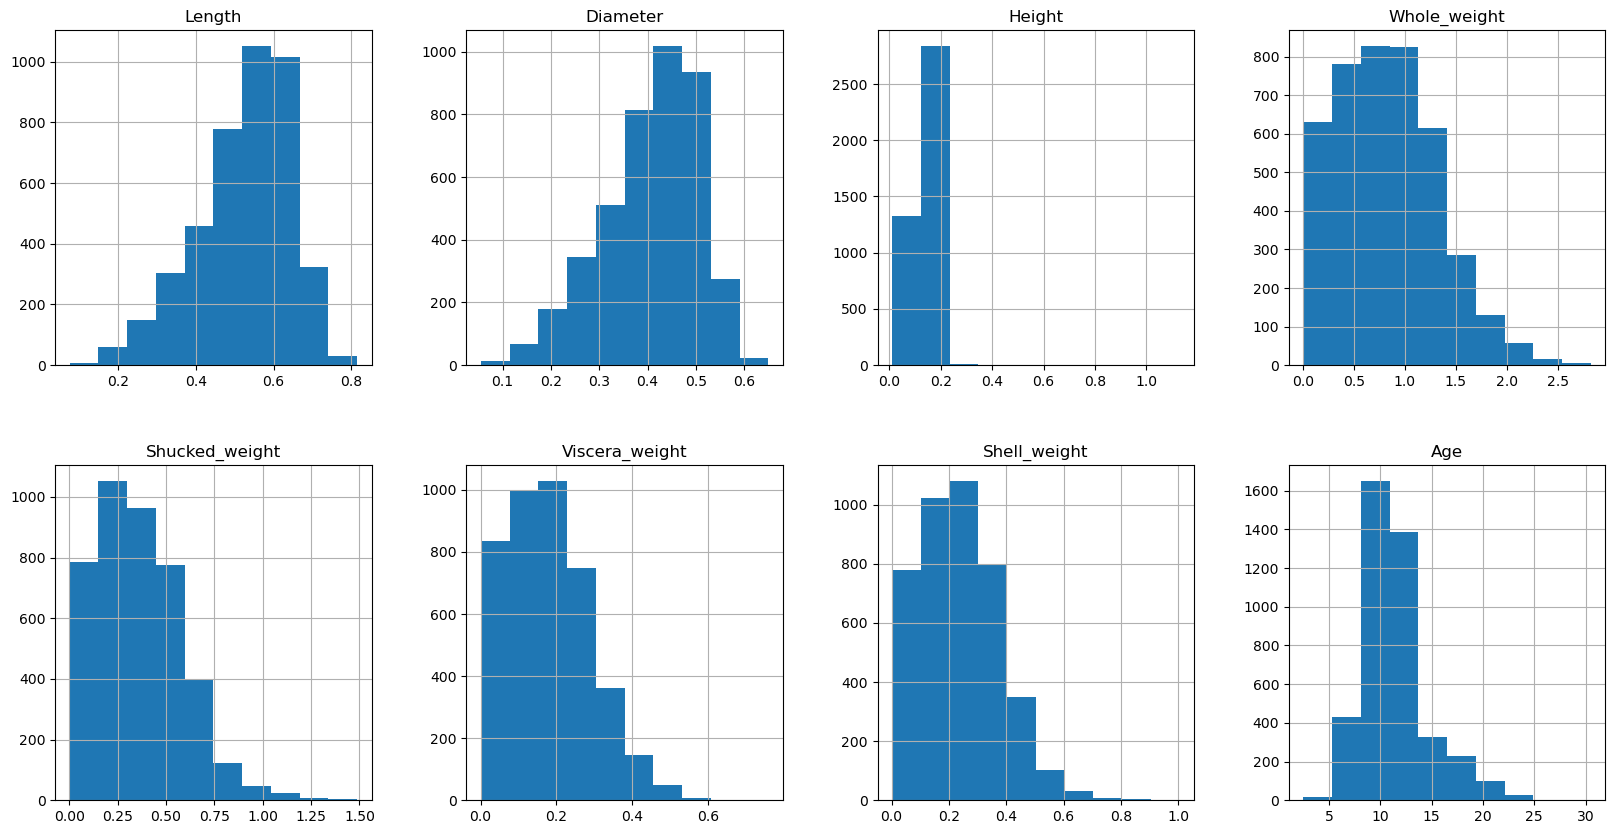

In [13]:
df.hist(figsize = (20,10), layout = (2,4))

We can see that the height feature has too much skewness. We will need to normalize it later.

## Skewness of the Variables

In [14]:
df.skew().sort_values(ascending = False)

Height            3.166364
Age               1.113754
Shucked_weight    0.718735
Shell_weight      0.621081
Viscera_weight    0.591455
Whole_weight      0.530549
Diameter         -0.610182
Length           -0.640993
dtype: float64

Skewness is close to 0 for Normal distribution curve.
Height has the highest skewness of 3.17.

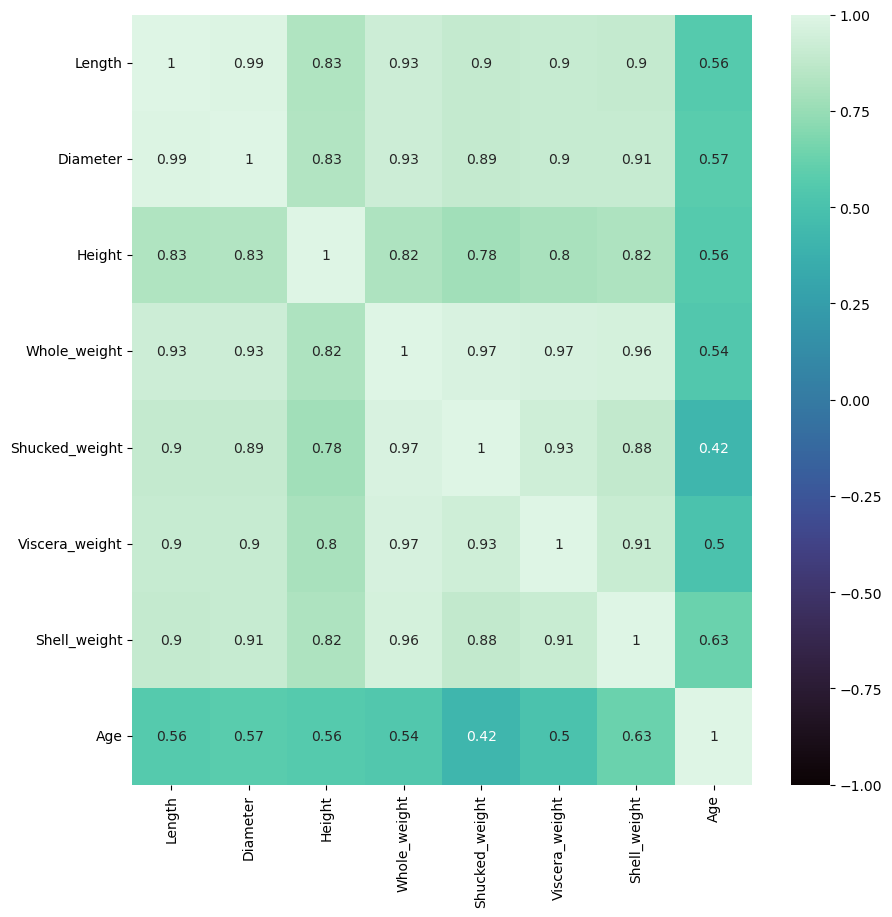

In [15]:
corr = df.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin = -1, center = 0, annot = True, cmap = 'mako')

There is very high correlation between shucked weight, viscera weight, Whole_weight and Shell weight. Similarly Diameter and length also have very high correlation. This means that these variables have nearly the same trend regarding the output variable. We can keep one of them and drop the rest.

In [16]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] #highly correlated variables to be removed.

print("Columns to drop:\n", columns_to_drop)

Columns to drop:
 ['Diameter', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']


In [17]:
df.drop(columns_to_drop, axis=1, inplace = True)

Text(0.5, 1.0, 'height vs sex')

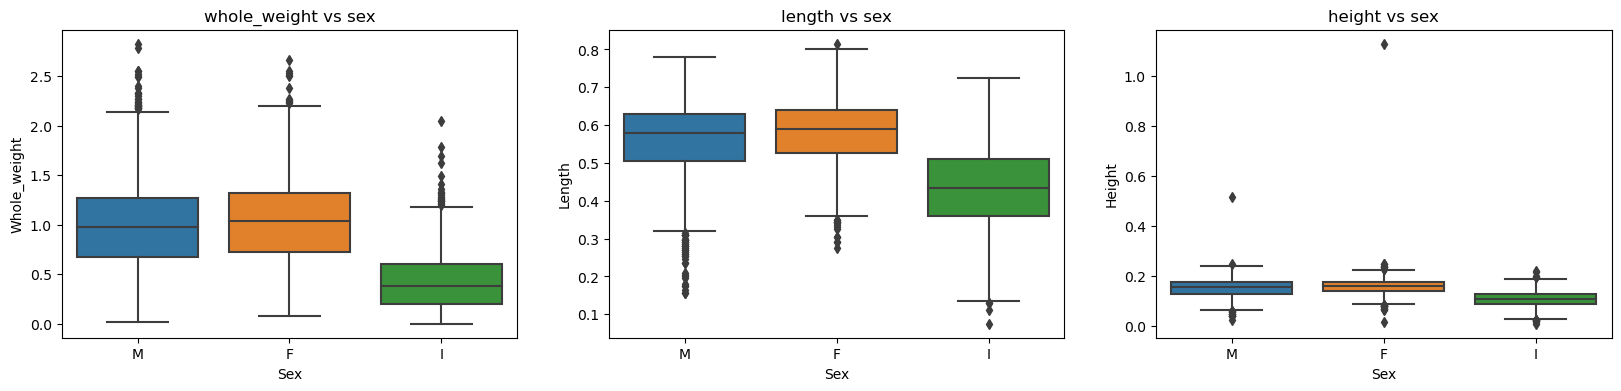

In [18]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'Sex', y = 'Whole_weight', data = df, ax = axes[0])
axes[0].set_title('whole_weight vs sex')

sns.boxplot(x = 'Sex', y = 'Length', data = df, ax = axes[1])
axes[1].set_title('length vs sex')

sns.boxplot(x = 'Sex', y = 'Height', data = df, ax = axes[2])
axes[2].set_title('height vs sex')

### Normalise Height

- By doing Square root transofrmation

In [19]:
df['Height'] = np.sqrt(df['Height'])

## Histograms: Distribution of the Numerical Features

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole_weight'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

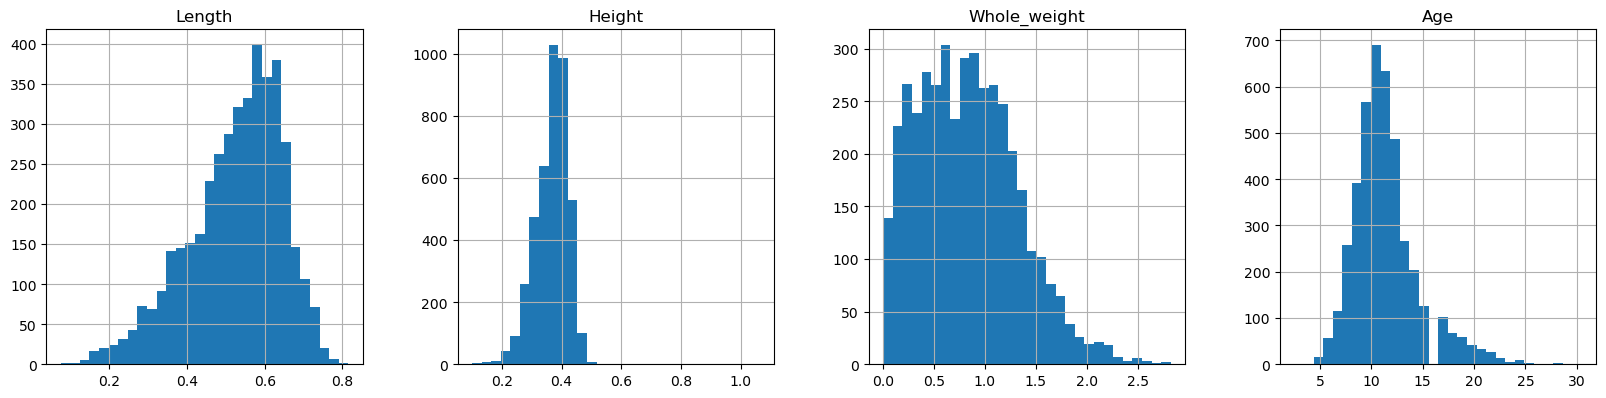

In [20]:
df.hist(figsize = (20,10), layout = (2,4), bins = 30)

# Model Creation

In [21]:
Age = []
for i in df["Whole_weight"]:
    if i < 0.6:
        Age.append(1)
    elif i > 0.6 and i < 1.0 :
        Age.append(2)
    else:
        Age.append(3)
df["Age"] = Age
#df_1.drop("age" , axis =1,inplace=True)
df.head()

,Sex,Length,Height,Whole_weight,Age
0,M,0.455,0.308221,0.5140,1
1,M,0.350,0.300000,0.2255,1
2,F,0.530,0.367423,0.6770,2
3,M,0.440,0.353553,0.5160,1
4,I,0.330,0.282843,0.2050,1


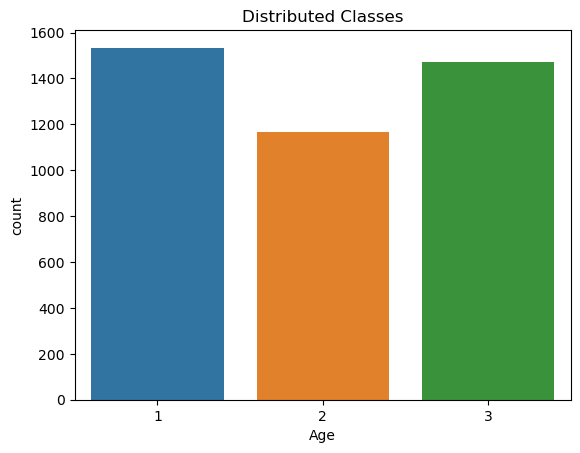

In [22]:
sns.countplot(x='Age', data=df)
plt.title('Distributed Classes')
plt.show()

In [23]:
df.Sex.value_counts()

M    1528
I    1340
F    1307
Name: Sex, dtype: int64

In [24]:
new_df = pd.get_dummies(df, columns = ['Sex'], prefix_sep='_')
new_df['Age'].value_counts()

1    1534
3    1473
2    1168
Name: Age, dtype: int64

In [25]:
new_df.head()

,Length,Height,Whole_weight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.308221,0.5140,1,0,0,1
1,0.350,0.300000,0.2255,1,0,0,1
2,0.530,0.367423,0.6770,2,1,0,0
3,0.440,0.353553,0.5160,1,0,0,1
4,0.330,0.282843,0.2050,1,0,1,0


In [26]:
new_df['Length'] = np.sqrt(new_df['Length'])

In [27]:
X = new_df.drop('Age', axis = 1)
y = new_df['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

X_train = X_train_std.values
X_test = X_test_std.values
y_train = y_train.values
y_test = y_test.values

classifiers = {"LogisiticRegression": LogisticRegression(),
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier()}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 98.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 97.0 % accuracy score
Classifiers:  SVC Has a training score of 97.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score


# We will choose Logistic Regression for further analysis

In [28]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_log = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log.fit(X_train, y_train)
log_reg = grid_log.best_estimator_
print('Best Estimators: ', log_reg)

Best Estimators:  LogisticRegression(C=1000, solver='newton-cg')


In [29]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5) #We will use best parameters for modeling
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  99.73%


In [33]:
model = LogisticRegression(C=1000, solver='newton-cg')
model.fit(X_train, y_train)

LogisticRegression(C=1000, solver='newton-cg')

In [34]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1229
           2       1.00      1.00      1.00       930
           3       1.00      1.00      1.00      1181

    accuracy                           1.00      3340
   macro avg       1.00      1.00      1.00      3340
weighted avg       1.00      1.00      1.00      3340



In [35]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       305
           2       0.99      0.98      0.99       238
           3       1.00      1.00      1.00       292

    accuracy                           0.99       835
   macro avg       0.99      0.99      0.99       835
weighted avg       0.99      0.99      0.99       835



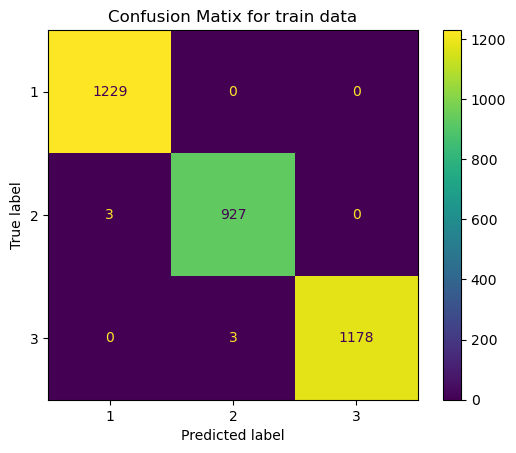

In [31]:
plot_confusion_matrix(model, X_train, y_train)
plt.title("Confusion Matix for train data")
plt.show()

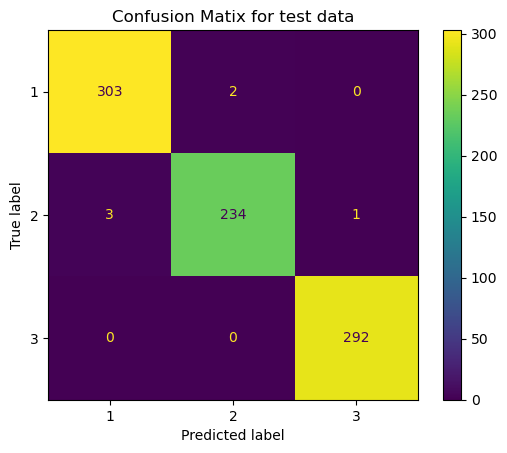

In [32]:
plot_confusion_matrix(model, X_test, y_test)
plt.title("Confusion Matix for test data")
plt.show()